In [1]:
from modules.data_loading import load_train_data, load_test_data
from modules.data_preprocessing import clean_data, feature_engineering
import pandas as pd
import numpy as np
import ydata_profiling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
#from math import sqrt
#import re
#from datetime import datetime
#from sklearn.preprocessing import StandardScaler
#from sklearn.manifold import TSNE
#from sklearn.cluster import KMeans
from modules.figure_generation import TSNE_kMeans_figure, random_forest_features
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=load_train_data()
df_cleaned = clean_data(df)
df_engineered = feature_engineering(df_cleaned)
df_engineered.shape[0]

1670

In [3]:
# Extract quantitative columns
quantitatives = df_engineered.select_dtypes(include=['int64', 'float64']).copy()
# Drop the 'ID' column
quantitatives = quantitatives.drop(columns=['ID','price', 'rooms', 'bedrooms', 'washrooms', 'year_built',
                                            'has_certificate', 'year_certificate', 'due_certificate',
                                            'Plinthes électriques', 'Convecteurs',
                                            'Eau chaude', 'Air soufflé (pulsé)', 'Radiant', 'Thermopompe',
                                            'Gaz naturel', 'Poêle à bois', 'Foyer au gaz',
                                            'Porte de garage électrique',
                                            'Buanderie', 'Climatiseur', 'Aspirateur centrale', 'Spa',
                                            "Détecteur d'incendie (relié)", "Détecteur d'incendie (non relié)",
                                            'Adapté pour personne à mobilité réduite', 'Interphone', 'Fournaise',
                                            'Planchers chauffant', 'Ascenseur', "Échangeur d'air",
                                            "Système d'alarme", 'Borne de recharge', 'has_reno', 'last_year_reno', 'water_access',
                                            'min_price', 'max_price', 'fireplace_func', 'has_fireplace', 'has_pool', 'near_water', 'living_area'])


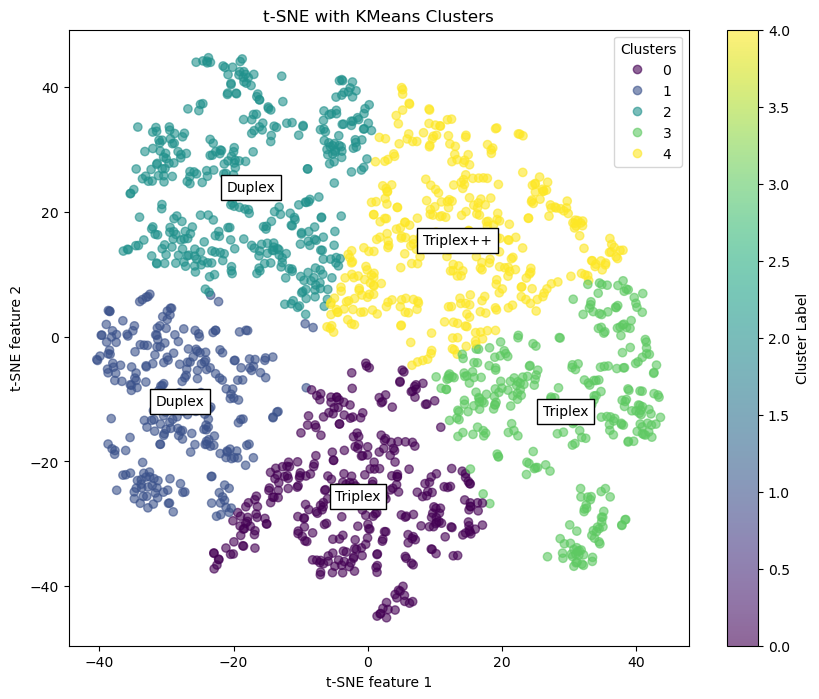

In [4]:
TSNE_kMeans_figure(quantitatives)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       106
           1       0.94      0.92      0.93        83
           2       0.91      0.92      0.91       109
           3       0.95      0.88      0.91        82
           4       0.89      0.89      0.89       121

    accuracy                           0.91       501
   macro avg       0.92      0.91      0.92       501
weighted avg       0.91      0.91      0.91       501



<Figure size 1200x800 with 0 Axes>

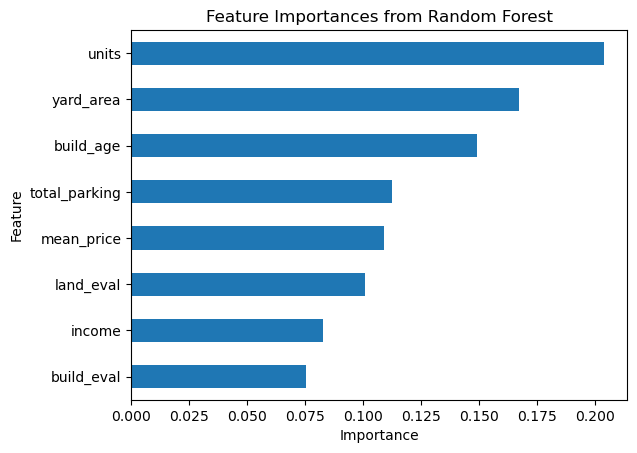

In [5]:
random_forest_features(quantitatives)

In [11]:
quantitatives[quantitatives['cluster_label'] == 0].describe()

,units,income,land_eval,build_eval,yard_area,total_parking,mean_price,build_age,cluster_label
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0
mean,2.028571,34704.337143,212646.528571,402316.231429,2787.773543,2.068571,819003.957930,64.011429,0.0
std,0.183208,9511.406113,59490.085820,94604.200171,640.478082,0.873609,16635.999812,9.794150,0.0
min,2.000000,3660.000000,75200.000000,190600.000000,95.690000,1.000000,793094.117647,22.000000,0.0
25%,2.000000,30900.000000,170850.000000,334075.000000,2295.250000,1.000000,807021.493213,58.000000,0.0
50%,2.000000,36000.000000,207550.000000,386150.000000,2790.980000,2.000000,814677.192090,63.000000,0.0
75%,2.000000,40200.000000,245950.000000,467925.000000,3241.007500,2.750000,832318.214286,68.000000,0.0
max,4.000000,65088.000000,398600.000000,695900.000000,4605.880000,4.000000,865199.126214,113.000000,0.0


In [12]:
quantitatives[quantitatives['cluster_label'] == 3].describe()

,units,income,land_eval,build_eval,yard_area,total_parking,mean_price,build_age,cluster_label
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.0
mean,2.702970,39753.072607,225425.455446,413984.115512,3730.091056,3.330033,813935.125519,58.900990,3.0
std,0.707732,10281.627671,68573.535891,111911.137754,777.994316,0.991682,36221.272368,10.504655,0.0
min,2.000000,9000.000000,40200.000000,124200.000000,2062.500000,1.000000,730000.000000,32.000000,3.0
25%,2.000000,33600.000000,172750.000000,326600.000000,3241.065000,3.000000,799456.087719,55.000000,3.0
50%,3.000000,40020.000000,218800.000000,409600.000000,3654.000000,4.000000,807639.860140,58.000000,3.0
75%,3.000000,45600.000000,270400.000000,482350.000000,4189.850000,4.000000,838453.596154,64.000000,3.0
max,5.000000,78096.000000,501900.000000,745800.000000,5949.960000,5.000000,1000000.000000,116.000000,3.0


In [13]:
quantitatives[quantitatives['cluster_label'] == 1].describe()

,units,income,land_eval,build_eval,yard_area,total_parking,mean_price,build_age,cluster_label
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.0
mean,2.056180,36309.692884,240548.033708,376846.220974,2202.606592,1.292135,842899.345879,99.067416,1.0
std,0.246458,9209.151457,82711.116744,109758.459806,572.355298,0.565996,19346.765144,20.579279,0.0
min,2.000000,2200.000000,87400.000000,151300.000000,176.500000,1.000000,793094.117647,24.000000,1.0
25%,2.000000,30930.000000,177000.000000,297650.000000,1869.385000,1.000000,832318.214286,86.000000,1.0
50%,2.000000,36300.000000,231900.000000,364900.000000,2124.790000,1.000000,848006.330855,98.000000,1.0
75%,2.000000,42876.000000,293250.000000,444800.000000,2500.460000,1.000000,849097.058824,113.000000,1.0
max,4.000000,57600.000000,486300.000000,692100.000000,5090.250000,5.000000,873711.864407,153.000000,1.0


In [14]:
quantitatives[quantitatives['cluster_label'] == 2].describe()

,units,income,land_eval,build_eval,yard_area,total_parking,mean_price,build_age,cluster_label
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.0
mean,3.367021,43690.904255,205479.672872,439526.736702,2244.117314,1.324468,830388.458697,88.515957,2.0
std,0.675971,9681.408005,67575.890714,123256.796488,514.293496,0.589723,20499.137756,21.475313,0.0
min,2.000000,21060.000000,86200.000000,174700.000000,162.000000,1.000000,793094.117647,31.000000,2.0
25%,3.000000,38100.000000,153675.000000,352100.000000,1948.750000,1.000000,814677.192090,69.000000,2.0
50%,3.000000,42348.000000,197250.000000,416650.000000,2210.910000,1.000000,832318.214286,93.000000,2.0
75%,4.000000,48390.000000,245661.750000,510500.000000,2521.572500,2.000000,848006.330855,108.000000,2.0
max,6.000000,141000.000000,432200.000000,795900.000000,3999.870000,4.000000,873711.864407,148.000000,2.0


In [15]:
quantitatives[quantitatives['cluster_label'] == 4].describe()

,units,income,land_eval,build_eval,yard_area,total_parking,mean_price,build_age,cluster_label
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.0
mean,3.101604,44763.978610,291807.299465,436256.692513,3651.688289,2.200535,831032.283082,65.267380,4.0
std,0.642839,8128.953434,103589.961486,114582.386380,851.200002,0.954684,23615.561066,15.474727,0.0
min,2.000000,20160.000000,63900.000000,127300.000000,1774.970000,1.000000,761656.406250,3.000000,4.0
25%,3.000000,39024.000000,211375.000000,358925.000000,2965.137500,2.000000,807639.860140,58.000000,4.0
50%,3.000000,44244.000000,292450.000000,430700.000000,3738.150000,2.000000,832318.214286,65.000000,4.0
75%,3.000000,50400.000000,364800.000000,518775.000000,4208.960000,3.000000,849097.058824,72.000000,4.0
max,5.000000,71640.000000,564400.000000,747000.000000,5898.620000,5.000000,873711.864407,133.000000,4.0


EDA Profiling

In [16]:
quantitatives['price'] = df_engineered['price']
profile = quantitatives.profile_report()
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
quantitatives.describe()